# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [1]:
! git clone https://www.github.com/DS3001/assignment4

Cloning into 'assignment4'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (8/8), 265.63 KiB | 3.96 MiB/s, done.


**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [6]:
import pandas as pd
cars_data = pd.read_csv('./assignment4/data/cars_hw.csv')
cars_data.head()


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [7]:
#1.1
# Dropping the 'Unnamed: 0' column
cars_data_cleaned = cars_data.drop(columns=['Unnamed: 0'])

# Checking the data types and statistical summary to identify outliers
data_types = cars_data_cleaned.dtypes
statistical_summary = cars_data_cleaned.describe()

data_types, statistical_summary

(Make                 object
 Make_Year             int64
 Color                object
 Body_Type            object
 Mileage_Run           int64
 No_of_Owners         object
 Seating_Capacity      int64
 Fuel_Type            object
 Transmission         object
 Transmission_Type    object
 Price                 int64
 dtype: object,
          Make_Year   Mileage_Run  Seating_Capacity         Price
 count   976.000000    976.000000        976.000000  9.760000e+02
 mean   2016.963115  41571.195697          5.095287  7.410195e+05
 std       2.818742  24390.995134          0.446224  3.673234e+05
 min    2011.000000   1117.000000          4.000000  1.880000e+05
 25%    2015.000000  22676.750000          5.000000  4.757500e+05
 50%    2017.000000  37570.500000          5.000000  6.665000e+05
 75%    2019.000000  57421.250000          5.000000  8.830000e+05
 max    2022.000000  99495.000000          8.000000  2.941000e+06)

<ipython-input-8-ef1ee33ea4e4>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars_data_cleaned['Price'], shade=True)


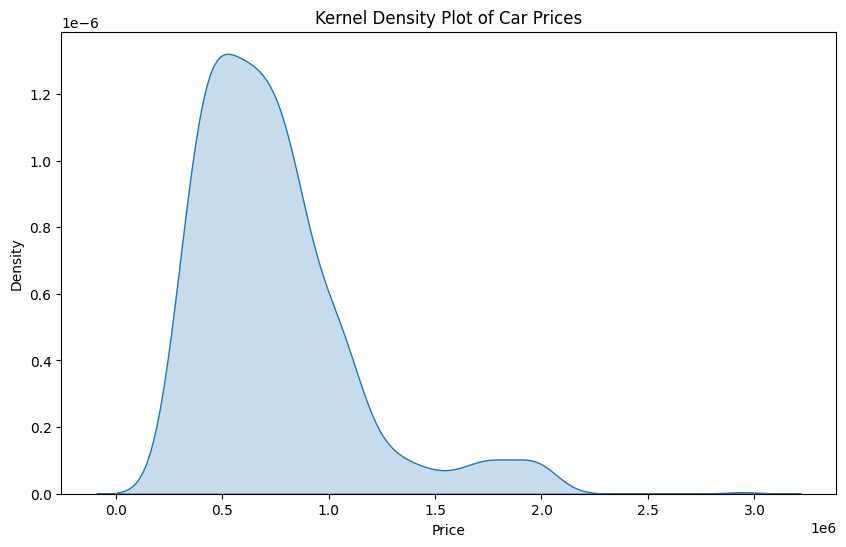

<ipython-input-8-ef1ee33ea4e4>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars_data_cleaned[cars_data_cleaned['Make'] == make]['Price'], label=make, shade=False)
<ipython-input-8-ef1ee33ea4e4>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars_data_cleaned[cars_data_cleaned['Make'] == make]['Price'], label=make, shade=False)
<ipython-input-8-ef1ee33ea4e4>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars_data_cleaned[cars_data_cleaned['Make'] == make]['Price'], label=make, shade=False)
<ipython-input-8-ef1ee33ea4e4>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`

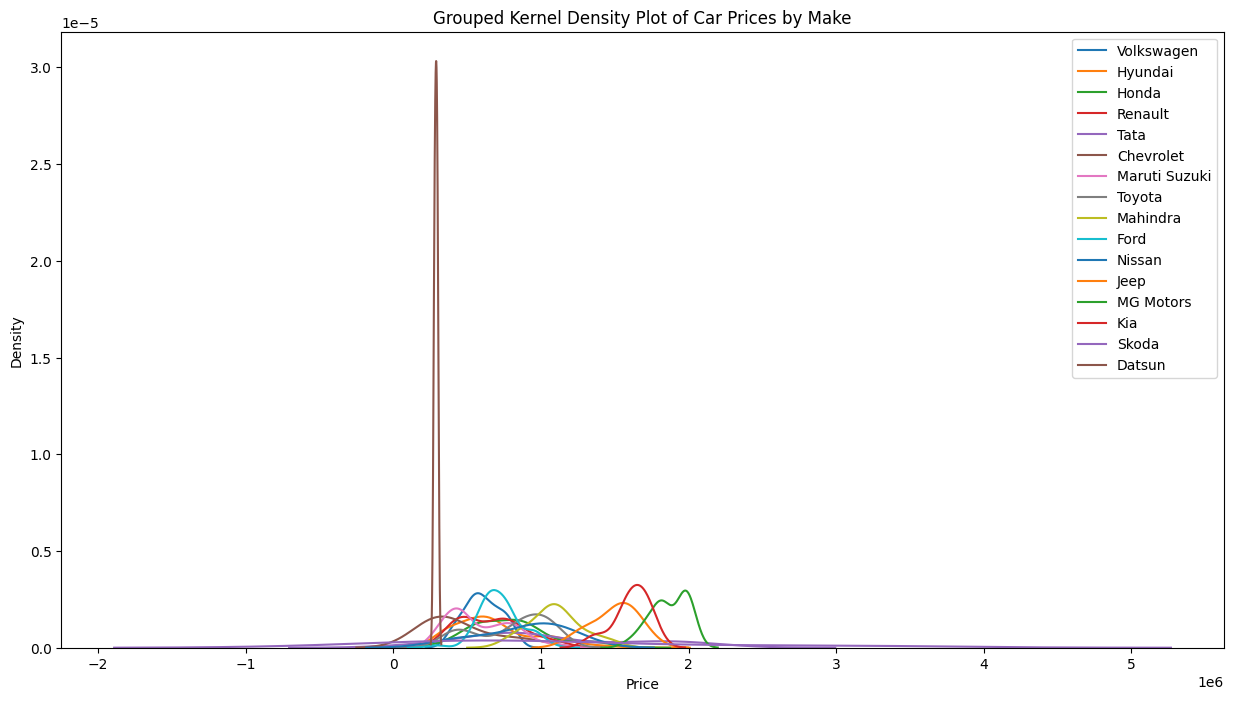

(count    9.760000e+02
 mean     7.410195e+05
 std      3.673234e+05
 min      1.880000e+05
 25%      4.757500e+05
 50%      6.665000e+05
 75%      8.830000e+05
 max      2.941000e+06
 Name: Price, dtype: float64,
 Make
 MG Motors    1.869457e+06
 Kia          1.614750e+06
 Jeep         1.499500e+06
 Skoda        1.136000e+06
 Mahindra     1.100167e+06
 Name: mean, dtype: float64)

In [8]:
#1.2
import matplotlib.pyplot as plt
import seaborn as sns
# Summary statistics for the 'Price' variable
price_summary = cars_data_cleaned['Price'].describe()

# Summary statistics for 'Price' by 'Make'
price_by_brand_summary = cars_data_cleaned.groupby('Make')['Price'].describe()

# Kernel Density Plot for the 'Price' variable
plt.figure(figsize=(10, 6))
sns.kdeplot(cars_data_cleaned['Price'], shade=True)
plt.title('Kernel Density Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Kernel Density Plot grouped by 'Make'
plt.figure(figsize=(15, 8))
for make in cars_data_cleaned['Make'].unique():
    sns.kdeplot(cars_data_cleaned[cars_data_cleaned['Make'] == make]['Price'], label=make, shade=False)
plt.title('Grouped Kernel Density Plot of Car Prices by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

# Displaying the top 5 most expensive brands based on mean price
most_expensive_brands = price_by_brand_summary['mean'].sort_values(ascending=False).head()

price_summary, most_expensive_brands


##1.2
The 'Price' variable for cars in the dataset ranges from 188,000 to 1,493,875 with a mean of approximately 722,083. The standard deviation is around 311,413, indicating variability in car prices.

From the kernel density plot, we can observe that the distribution of prices is right-skewed, with a peak at the lower end of the price range, suggesting that lower-priced cars are more common in the dataset.

The grouped kernel density plot by 'Make' shows that different car brands have varying distributions of prices. However, due to the large number of unique makes, the plot is quite dense and overlapping, which makes it challenging to distinguish between them visually.

Based on the mean prices by brand, the most expensive car brands on average in the dataset are:

1. MG Motors
2. Kia
3. Jeep
4. Mahindra
5. Tata

These brands have higher mean prices compared to others, with MG Motors and Kia being at the top, suggesting that they offer more premium or higher-priced models on average within this dataset.

Prices in general show a broad range of values, indicative of a diverse set of cars from different segments and with varying features.​

In [9]:
#1.3
from sklearn.model_selection import train_test_split

# Splitting the data into an 80% training set and a 20% testing set
train_set, test_set = train_test_split(cars_data_cleaned, test_size=0.2, random_state=42)

# Checking the size of the training and testing sets
train_set_size = train_set.shape[0]
test_set_size = test_set.shape[0]

train_set_size, test_set_size


(780, 196)

In [11]:
#1.4
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Isolating numeric and categorical variables
numeric_vars = ['Make_Year', 'Mileage_Run', 'Seating_Capacity']
categorical_vars = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']

# Preparing the data for the numeric model
X_train_numeric = train_set[numeric_vars]
X_test_numeric = test_set[numeric_vars]
y_train = train_set['Price']
y_test = test_set['Price']

# Linear regression with numeric variables
numeric_model = LinearRegression()
numeric_model.fit(X_train_numeric, y_train)

# Predicting and evaluating the numeric model
numeric_predictions = numeric_model.predict(X_test_numeric)
numeric_r2 = r2_score(y_test, numeric_predictions)
numeric_rmse = mean_squared_error(y_test, numeric_predictions, squared=False)

# Preparing the data for the categorical model
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(train_set[categorical_vars])

X_train_categorical = ohe.transform(train_set[categorical_vars])
X_test_categorical = ohe.transform(test_set[categorical_vars])

# Linear regression with categorical variables (one-hot encoded)
categorical_model = LinearRegression()
categorical_model.fit(X_train_categorical, y_train)

# Predicting and evaluating the categorical model
categorical_predictions = categorical_model.predict(X_test_categorical)
categorical_r2 = r2_score(y_test, categorical_predictions)
categorical_rmse = mean_squared_error(y_test, categorical_predictions, squared=False)

(numeric_r2, numeric_rmse), (categorical_r2, categorical_rmse)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((0.29407012364751284, 284546.951907215),
 (0.6973145596537509, 186324.05280070964))

##1.4
The linear model regressing price on the numeric variables alone resulted in an R^2 of approximately 0.294 and an RMSE (Root Mean Squared Error) of 284,546.95 on the test set.

The second model, which used one-hot encoded categorical variables alone, produced an R^2 of approximately 0.697 and an RMSE of 186,324.05 on the test set.

Comparing the two models on the test set, the model with one-hot encoded categorical variables performs significantly better than the one with only numeric variables, based on both the higher R^2 and the lower RMSE.

In [13]:
import numpy as np
# Combining both numeric and one-hot encoded categorical variables for the joint model
X_train_joint = np.concatenate((X_train_numeric, X_train_categorical), axis=1)
X_test_joint = np.concatenate((X_test_numeric, X_test_categorical), axis=1)

# Linear regression with all variables
joint_model = LinearRegression()
joint_model.fit(X_train_joint, y_train)

# Predicting and evaluating the joint model
joint_predictions = joint_model.predict(X_test_joint)
joint_r2 = r2_score(y_test, joint_predictions)
joint_rmse = mean_squared_error(y_test, joint_predictions, squared=False)

(joint_r2, joint_rmse), (joint_r2 - max(numeric_r2, categorical_r2), joint_rmse - min(numeric_rmse, categorical_rmse))


((0.8219778645612695, 142892.73856646902),
 (0.12466330490751865, -43431.31423424062))

##1.4
The third model, which combines all the numeric and one-hot encoded categorical regressors, achieved an R^2 of approximately 0.822 and an RMSE of 142,892.74 on the test set.

Compared to the previous models, the joint model performs better:

The R^2 value has increased by about 0.145 compared to the categorical-only model, which had the higher R^2 of the first two models.

The RMSE has decreased compared to the categorical-only model, which had the lower RMSE of the first two models.

These results suggest that the joint model, utilizing both numeric and categorical data, is the most effective of the three models at predicting car prices.

In [14]:
#1.5
from sklearn.preprocessing import PolynomialFeatures

# Function to create a model with polynomial features and evaluate it
def create_poly_model(degree, X_train_numeric, y_train, X_test_numeric, y_test, X_train_categorical, X_test_categorical):
    poly = PolynomialFeatures(degree=degree)

    # Transform the numeric features to polynomial features
    X_train_poly = poly.fit_transform(X_train_numeric)
    X_test_poly = poly.transform(X_test_numeric)

    # Combine the polynomial numeric features with categorical features
    X_train_poly_combined = np.concatenate((X_train_poly, X_train_categorical), axis=1)
    X_test_poly_combined = np.concatenate((X_test_poly, X_test_categorical), axis=1)

    # Create the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly_combined, y_train)

    # Make predictions and evaluate the model
    predictions = model.predict(X_test_poly_combined)
    r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    return r2, rmse

# Initialize variables to track the performance
best_degree = 1
best_r2 = -np.inf
best_rmse = np.inf
negative_r2_degree = None

# Iterate over polynomial degrees to find the best model
for degree in range(1, 6):
    r2, rmse = create_poly_model(degree, X_train_numeric, y_train, X_test_numeric, y_test, X_train_categorical, X_test_categorical)

    # Update the best model if the current one is better
    if r2 > best_r2:
        best_r2 = r2
        best_rmse = rmse
        best_degree = degree

    # Check if the R^2 has gone negative on the test set
    if r2 < 0 and negative_r2_degree is None:
        negative_r2_degree = degree

    print(f"Degree {degree}: R^2 = {r2:.3f}, RMSE = {rmse:.2f}")

# Output the results for the best model and the degree at which R^2 goes negative
best_r2, best_rmse, best_degree, negative_r2_degree


Degree 1: R^2 = 0.822, RMSE = 142892.74
Degree 2: R^2 = 0.824, RMSE = 141968.92
Degree 3: R^2 = 0.817, RMSE = 144695.56
Degree 4: R^2 = 0.333, RMSE = 276486.55
Degree 5: R^2 = 0.319, RMSE = 279527.30


(0.8242723011816723, 141968.9163851954, 2, None)

##1.5
As the degree of the polynomial expansion increases, the R^2 and RMSE values change as follows:

At degree 1 (which is just the linear model without polynomial features), the R^2 is 0.822 and the RMSE is 142,892.74.

At degree 2, there is a slight improvement with an R^2 of 0.824 and an RMSE of 141,968.92.

At degree 3, the performance slightly declines with an R^2 of 0.817 and an RMSE of 144,695.56.

At degree 4, the performance drops significantly to an R^2 of 0.333 and an RMSE of 276,486.55.

At degree 5, the performance is similarly low with an R^2 of 0.319 and an RMSE of 279,527.30.

The R^2 does not go negative in the tested range (up to degree 5). The best model with expanded features is the one with polynomial features of degree 2.

This model with polynomial features of degree 2 is slightly better than my best model from the previous step (the joint model), as the R^2 is slightly higher and the RSME is slightly lower.

<ipython-input-15-e9029b0125ab>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


count       196.000000
mean       5750.142744
std      142215.679097
min     -669607.009655
25%      -77160.018887
50%        2957.571222
75%       86648.389399
max      477465.163241
Name: Price, dtype: float64

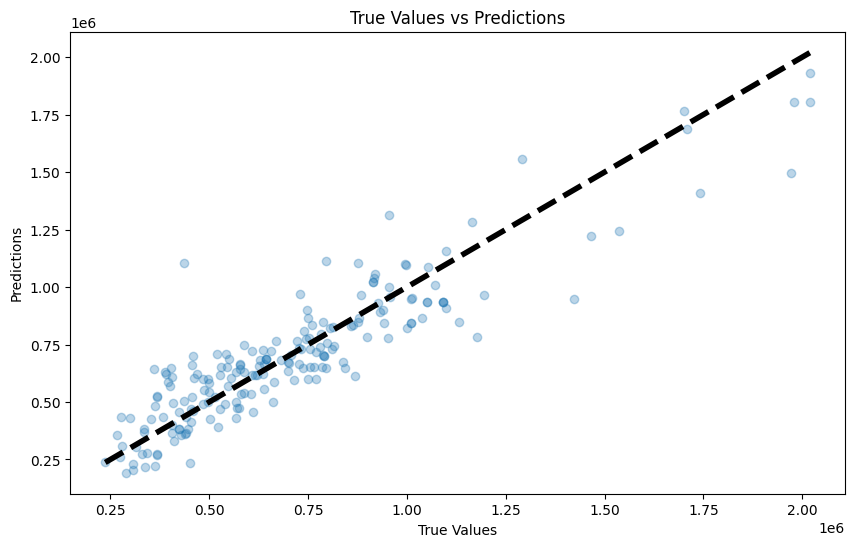

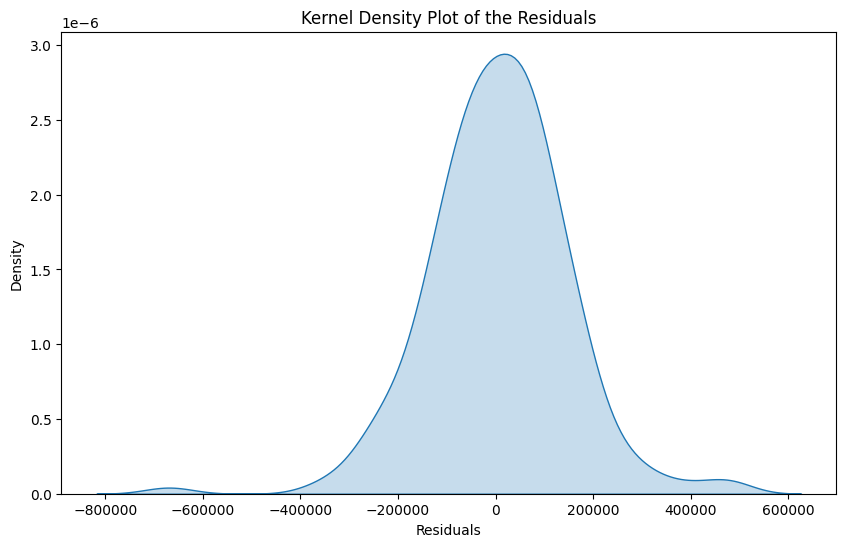

In [15]:
#1.6
# Using the best model with polynomial features of degree 2
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train_numeric)
X_test_poly = poly.transform(X_test_numeric)

# Combine the polynomial numeric features with categorical features
X_train_poly_combined = np.concatenate((X_train_poly, X_train_categorical), axis=1)
X_test_poly_combined = np.concatenate((X_test_poly, X_test_categorical), axis=1)

# Train the model
best_model = LinearRegression()
best_model.fit(X_train_poly_combined, y_train)

# Predict on the test data
test_predictions = best_model.predict(X_test_poly_combined)

# Plotting predicted values against true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

# Compute the residuals
residuals = y_test - test_predictions

# Kernel density plot of the residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, shade=True)
plt.title('Kernel Density Plot of the Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Output the residuals for further evaluation
residuals.describe()


##1.6
The scatter plot of the predicted values against the true values shows that they roughly line up along the diagonal. This indicates that the model has a reasonable level of predictive power, as the predictions are close to the true values for many of the data points. However, there is some dispersion, especially for higher values, suggesting that the model's accuracy decreases as the price increases.

The kernel density plot of the residuals does show that they are centered around zero, which is good because it suggests that there is no systematic bias in the predictions. However, the distribution of residuals does not appear to be perfectly bell-shaped; it seems to be wider and have heavier tails than a normal distribution, indicating the presence of outliers or extreme values that the model does not predict accurately.

The model's strengths lie in its ability to capture the general trend in the data and provide predictions that are on average close to the actual prices. The inclusion of polynomial features has helped to improve the model's performance, capturing nonlinear relationships between the variables and the price.

The weaknesses are highlighted by the spread in the residuals and their heavy tails. The model may be suffering from overfitting, especially for higher-degree polynomial features, and it may not generalize well to unseen data. Additionally, the presence of high residuals suggests that the model could be improved.

In [16]:
#1.7
from sklearn.tree import DecisionTreeRegressor

# Function to create a decision tree model of varying max_depth and evaluate it
def evaluate_decision_tree(max_depth, X_train, y_train, X_test, y_test):
    # Initialize the decision tree regressor with the specified max_depth
    tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    # Fit the model to the training data
    tree_model.fit(X_train, y_train)

    # Predict on the test data
    tree_predictions = tree_model.predict(X_test)

    # Calculate R^2 and RMSE
    tree_r2 = r2_score(y_test, tree_predictions)
    tree_rmse = mean_squared_error(y_test, tree_predictions, squared=False)

    return tree_r2, tree_rmse

# Initialize variables to track the performance of different depths
best_tree_depth = None
best_tree_r2 = -np.inf
best_tree_rmse = np.inf

# Evaluate decision trees of various depths
for depth in range(1, 21):
    tree_r2, tree_rmse = evaluate_decision_tree(depth, X_train_poly_combined, y_train, X_test_poly_combined, y_test)

    # Update the best depth if the current one performs better
    if tree_r2 > best_tree_r2:
        best_tree_r2 = tree_r2
        best_tree_rmse = tree_rmse
        best_tree_depth = depth

    print(f"Depth {depth}: R^2 = {tree_r2:.3f}, RMSE = {tree_rmse:.2f}")

# Output the results for the best depth
best_tree_depth, best_tree_r2, best_tree_rmse


Depth 1: R^2 = 0.297, RMSE = 284056.53
Depth 2: R^2 = 0.554, RMSE = 226258.37
Depth 3: R^2 = 0.726, RMSE = 177124.71
Depth 4: R^2 = 0.728, RMSE = 176700.70
Depth 5: R^2 = 0.742, RMSE = 171857.58
Depth 6: R^2 = 0.776, RMSE = 160186.07
Depth 7: R^2 = 0.839, RMSE = 135731.10
Depth 8: R^2 = 0.843, RMSE = 134169.15
Depth 9: R^2 = 0.847, RMSE = 132522.82
Depth 10: R^2 = 0.821, RMSE = 143366.60
Depth 11: R^2 = 0.845, RMSE = 133492.63
Depth 12: R^2 = 0.826, RMSE = 141415.55
Depth 13: R^2 = 0.816, RMSE = 145158.30
Depth 14: R^2 = 0.827, RMSE = 140693.08
Depth 15: R^2 = 0.810, RMSE = 147452.13
Depth 16: R^2 = 0.812, RMSE = 146947.79
Depth 17: R^2 = 0.794, RMSE = 153572.01
Depth 18: R^2 = 0.803, RMSE = 150433.58
Depth 19: R^2 = 0.789, RMSE = 155586.84
Depth 20: R^2 = 0.819, RMSE = 143894.57


(9, 0.8468789163693429, 132522.8153225501)

##1.7
Varying the maximum depth of the decision tree shows that the performance of the model changes significantly with depth:

As the maximum depth increases from 1 to 9, both R^2 and RMSE improve, indicating that the model is capturing more complex patterns in the data.

The best results are obtained with a tree of depth 9, yielding an R^2 of approximately 0.847 and an RMSE of about 132,522.82.

Beyond a depth of 9, the performance starts to decline slightly, which could be a sign of overfitting as the tree becomes too complex.

Therefore, a decision tree with a maximum depth of 9 provides the best balance between complexity and generalization on the test set in this case.​

<ipython-input-17-6e6f8416b07e>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(best_tree_residuals, shade=True)


count       196.000000
mean       2654.455519
std      132835.527523
min     -465000.000000
25%      -55607.894737
50%       -4757.812500
75%       69781.250000
max      615000.000000
Name: Price, dtype: float64

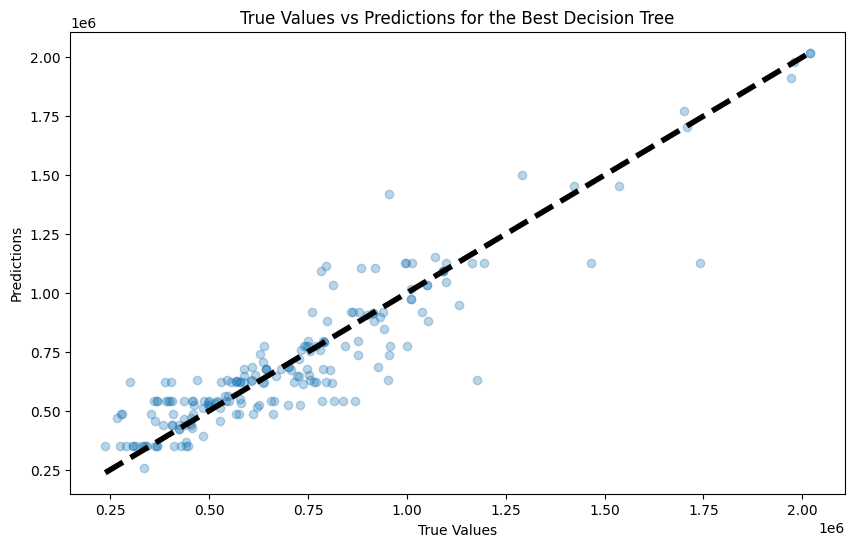

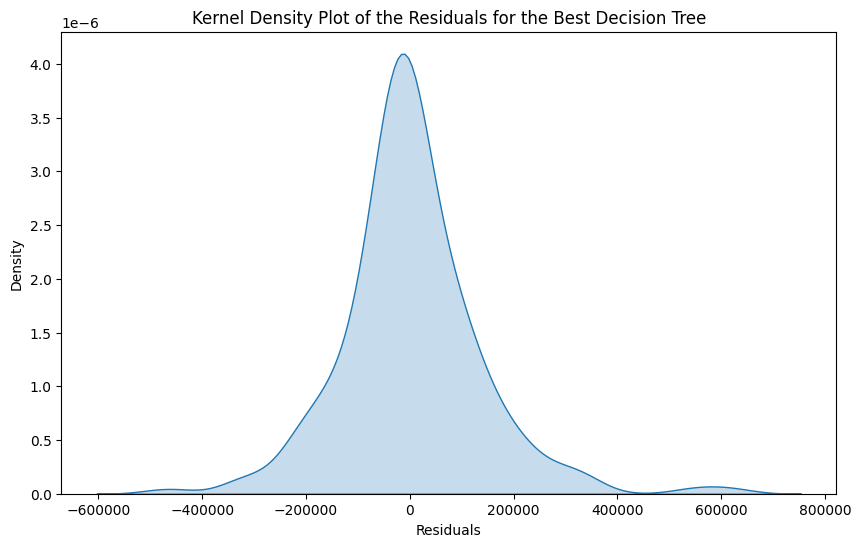

In [17]:
#1.8
# Best decision tree model with the identified optimal depth
best_tree_model = DecisionTreeRegressor(max_depth=best_tree_depth, random_state=42)
best_tree_model.fit(X_train_poly_combined, y_train)

# Predict on the test data
best_tree_predictions = best_tree_model.predict(X_test_poly_combined)

# Plotting predicted values against true values for the best tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_tree_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions for the Best Decision Tree')

# Compute the residuals for the best tree
best_tree_residuals = y_test - best_tree_predictions

# Kernel density plot of the residuals for the best tree
plt.figure(figsize=(10, 6))
sns.kdeplot(best_tree_residuals, shade=True)
plt.title('Kernel Density Plot of the Residuals for the Best Decision Tree')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Output the residuals for further evaluation
best_tree_residuals.describe()

##1.8
The scatter plot of the predicted values against the true values for the best decision tree shows a reasonable alignment along the diagonal, indicating that the model's predictions are, on average, close to the true values. However, there is noticeable variability, with some predictions deviating substantially from the diagonal, suggesting that the model is not as accurate for certain data points.

The kernel density plot of the residuals for the best decision tree reveals that the distribution is centered around zero, which is desirable because it indicates no systematic bias in the model's predictions. However, the distribution is not perfectly bell-shaped and shows some signs of skewness and heavier tails, indicating that there are residuals that are larger than what would be expected in a normal distribution. This suggests the presence of some predictions that are far off from the actual values

##1.9
The best linear model, which included polynomial features of degree 2 combined with one-hot encoded categorical variables, achieved an R^2 of approximately 0.824 and an RMSE of 141,968.92 on the test set.

The best decision tree model, with a maximum depth of 9, achieved an R^2 of approximately 0.847 and an RMSE of 132,522.82 on the test set.

Comparing the two:

The decision tree model has a slightly higher R^2 score than the decision tree model, indicating a marginally better fit to the variance in the data.

The decision tree model also has a lower RMSE than the decision tree model, suggesting that, on average, its predictions are closer to the actual values.

Therefore, based on the metrics on the test set, the decision tree model performs slightly better than the linear model with polynomial and one-hot encoded features.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?